In [76]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [77]:
## original dataframe
print("original dataframe")
filedata = r"C:\Users\umay2\Desktop\SUFFER\UNIV\SEMESTER 2\Metode Sains Data I\Tugas 3 MSD MLM\CourseraDataset-Clean_new.csv"
df = pd.read_csv(filedata)
print(df)

original dataframe
                                           Course Title  Rating  \
0                                     Fashion as Design     4.8   
1                                Modern American Poetry     4.4   
2                             Pixel Art for Video Games     4.5   
3       Distribución digital de la música independiente     0.0   
4     The Blues: Understanding and Performing an Ame...     4.8   
...                                                 ...     ...   
8365  Architecting with Google Kubernetes Engine: Pr...     4.9   
8366  Computational Thinking for K-12 Educators: Nes...     0.0   
8367           Cómo combinar y analizar datos complejos     0.0   
8368  Architecting with Google Kubernetes Engine: Wo...     0.0   
8369                 Visualizing static networks with R     0.0   

                   Level           Schedule  \
0         Beginner level  Flexible schedule   
1         Beginner level  Flexible schedule   
2         Beginner level  Flexible 

In [78]:
## deskripsi dataframe numerik
print('')
print("deskripsi dataframe numerik:")
df_numerik = df.drop(columns=["Course Title", "Level", "Schedule", "What you will learn", "Skill gain"], axis=0)
maindata = df_numerik.describe()
print(maindata)


deskripsi dataframe numerik:
            Rating  Duration to complete (Approx.)  Number of Review
count  8370.000000                     8370.000000       8370.000000
mean      4.005974                       29.245968       2044.256631
std       1.623430                       39.899608      10265.366839
min       0.000000                        1.000000          0.000000
25%       4.500000                       10.000000         32.000000
50%       4.700000                       16.000000        213.000000
75%       4.800000                       32.000000       1025.000000
max       5.000000                      480.000000     225830.000000


In [79]:
#definisikan variabel prediktor
#menyatukan prediktor dalam satu variabel x
x = df.drop(df.columns[[0,1,2,3,4,5]], axis=1)
print(x)


      Duration to complete (Approx.)  Number of Review
0                               20.0              2813
1                               34.0               100
2                                9.0               227
3                                8.0                 0
4                               11.0               582
...                              ...               ...
8365                            14.0                30
8366                            11.0                 0
8367                             9.0                 0
8368                            19.0                 0
8369                             2.0                 0

[8370 rows x 2 columns]


In [80]:
#definisikan variabel respon/convert ke int cause idk
#menaruh respon di variabel y 
y = df.Rating
print(y)

0       4.8
1       4.4
2       4.5
3       0.0
4       4.8
       ... 
8365    4.9
8366    0.0
8367    0.0
8368    0.0
8369    0.0
Name: Rating, Length: 8370, dtype: float64


Text(0.5, 1.0, 'Duration to complete vs Rating')

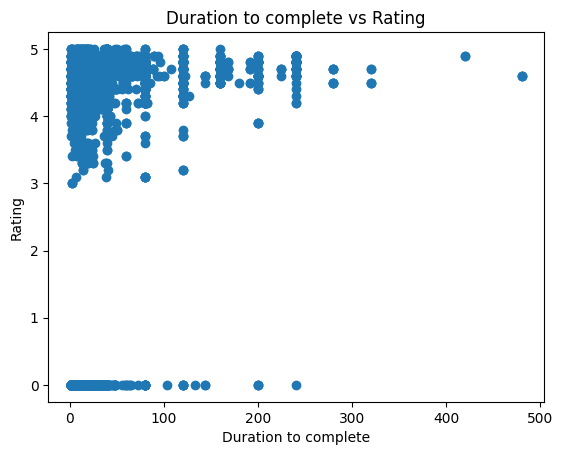

In [81]:
#scatterplot antara variabel prediktor (duration to complete) dan respon
plt.scatter(df[['Duration to complete (Approx.)']], df[["Rating"]])
plt.xlabel('Duration to complete')
plt.ylabel('Rating')
plt.title("Duration to complete vs Rating")

Text(0.5, 1.0, 'Number of Review vs Rating')

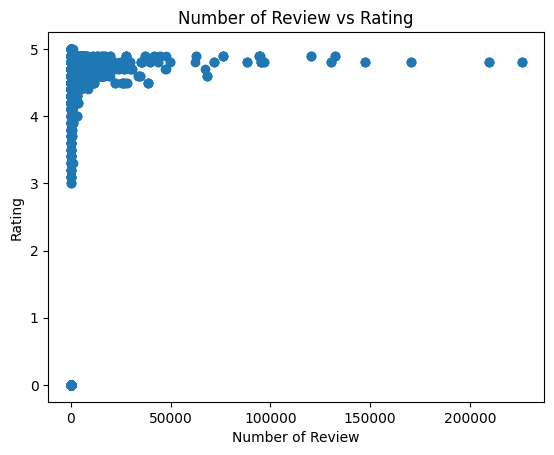

In [82]:
#scatterplot antara variabel prediktor (number of review) dan respon
plt.scatter(df[['Number of Review']], df[["Rating"]])
plt.xlabel('Number of Review')
plt.ylabel('Rating')
plt.title("Number of Review vs Rating")

In [83]:
#training data set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.8, random_state=100)

In [84]:
#inisialisasi model regresi linier
lreg= LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [85]:
#model coeficient
print( 'Model Coefficients')
#print koefisien regresi linier setiap predictor dalam bilangan desimal 5 angka di belakang koma
for col, coef in zip(x.columns, lreg. coef_):
    print(f' {col:>9}: {coef:0.5f}')

Model Coefficients
 Duration to complete (Approx.): 0.00601
 Number of Review: 0.00001


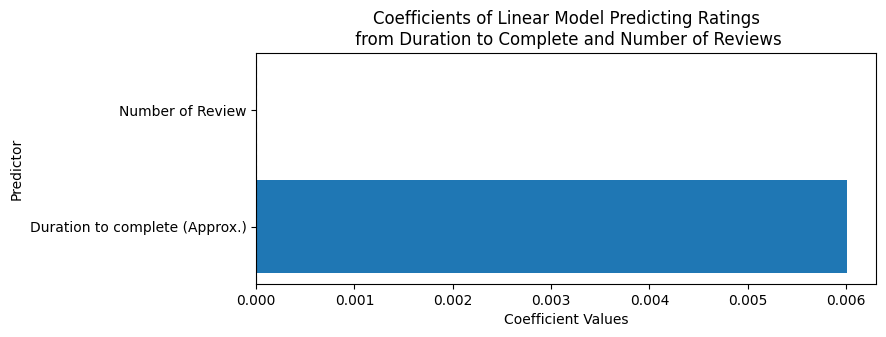

In [86]:
#Membuat barplot koefisien nilai penduga parameter model regresi linier
#mendefinisikan nama nama variabel yang ada di kolom x dan koefisien sebagai nilai penduga parameter model regresi linier 
cols = x. columns
coefs = lreg. coef_

#membuat barplot 
plt. figure(figsize=(8,3))
plt.barh(cols, coefs)
plt.axvline(0, c='k', ls='--', alpha=0.5)

plt.ylabel( 'Predictor')
plt.xlabel( 'Coefficient Values')

plt. title('Coefficients of Linear Model Predicting Ratings\n from Duration to Complete '\
'and Number of Reviews');

In [87]:
#menghitung koef det data training maupun test
train_detKoef = lreg.score(x_train, y_train)
test_detKoef = lreg.score(x_test, y_test)

print( 'Train R2:', train_detKoef)
print( 'Test R2:', test_detKoef)

Train R2: 0.028229151428272203
Test R2: 0.021662099085402953


In [88]:
#prediksi
y_pred_train = lreg.predict(x_train)
MSE_train = mean_squared_error(y_train,y_pred_train)

y_pred_test = lreg.predict(x_test)
MSE_test = mean_squared_error (y_test, y_pred_test)

print( 'Train MSE: ', MSE_train)
print( 'Test MSE: ', MSE_test)

Train MSE:  2.6184991964337816
Test MSE:  2.5635440670852905


In [89]:
mse_list = []
R2_list = []

cols = ['Duration to complete (Approx.)', 'Number of Review']
for col in cols:
    x_train, x_test, y_train, y_test = train_test_split(df[[col]], y, train_size=0.8, random_state=0)
    lreg = LinearRegression()
    lreg.fit(x_train, y_train)
    y_pred = lreg.predict(x_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2 = lreg.score(x_test, y_test)
    mse_list.append(MSE)
    R2_list.append(R2)

print(mse_list)

[2.5877925789174725, 2.615132727265717]


In [90]:
t = PrettyTable(['Predictors', 'MSE', 'R2'])

for i in range(len(cols)):
    t.add_row([cols[i], mse_list[i], R2_list[i]])

print(t)

+--------------------------------+--------------------+----------------------+
|           Predictors           |        MSE         |          R2          |
+--------------------------------+--------------------+----------------------+
| Duration to complete (Approx.) | 2.5877925789174725 | 0.018688647699817706 |
|        Number of Review        | 2.615132727265717  |  0.0083210478518706  |
+--------------------------------+--------------------+----------------------+


In [91]:
#evaluasi
#matrix antara nilai asli y dan prediksi 
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix= pd.DataFrame(confusion_matrix)
#bentuk heatmap
sns.set(font_scale=1.3)
axis=plt.axes()
plt.figure(figsize= (10,7))
#titles
axis.set_title(confusion_matrix)
sns.heatmap(matrix, annot= True, fmt="g",ax=axis, xticklabels=x, yticklabels=y, cmap="magma")
axis.set_xlabel("predicted values", fontsize= 14)
axis.set_ylabel("true values", fontsize= 14)
plt.show()

NameError: name 'metrics' is not defined